# Comparing food pricing in different states

Nigeria is often divided into six geopolitical zones with  based on cultural simialriity and proximity, this notebook takes into consideration one state from each of the zones and tries to present a theory for data behaviour.
Osun- south west 
Anambra- south east 
Bayelsa- south-south
Benue- North central
Bauchi- North east
Jigawa - north west



In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

## Import, loading data and creation of time series data set

In [2]:
original = pd.read_csv('..../input//CHOSENSTATES.csv')

In [3]:
foodprice= original.set_index('ItemLabels').T

foodprice.head()

ItemLabels,AGRIC EGGS DOZEN BENUE,Agric eggs(medium size price of one) BENUE,"Beans brown,sold loose BENUE",Beans:white black eye. sold loose BENUE,Beef Bone in BENUE,"Beef,boneless BENUE",Bread sliced 500g BENUE,Bread unsliced 500g BENUE,Broken Rice (Ofada) BENUE,Catfish (obokun) fresh BENUE,Catfish :dried BENUE,Catfish Smoked BENUE,Chicken Feet BENUE,Chicken Wings BENUE,Dried Fish Sardine BENUE,Evaporated tinned milk carnation 170g BENUE,"Evaporated tinned milk(peak), 170g BENUE",Frozen chicken BENUE,"Gari white,sold loose BENUE","Gari yellow,sold loose BENUE","Groundnut oil: 1 bottle, specify bottle BENUE",Iced Sardine BENUE,Irish potato BENUE,Mackerel : frozen BENUE,Maize grain white sold loose BENUE,Maize grain yellow sold loose BENUE,Mudfish (aro) fresh BENUE,Mudfish : dried BENUE,Onion bulb BENUE,"Palm oil: 1 bottle,specify bottle BENUE",Plantain(ripe) BENUE,Plantain(unripe) BENUE,Rice agric sold loose BENUE,Rice local sold loose BENUE,Rice Medium Grained BENUE,"Rice,imported high quality sold loose BENUE",Sweet potato BENUE,Tilapia fish (epiya) fresh BENUE,Titus:frozen BENUE,Tomato BENUE,"Vegetable oil:1 bottle,specify bottle BENUE",Wheat flour: prepacked (golden penny 2kg) BENUE,Yam tuber BENUE,Agric eggs medium size BAUCHI,Agric eggs(medium size price of one)BAUCHI,"Beans brown,sold looseBAUCHI",Beans:white black eye. sold looseBAUCHI,Beef Bone inBAUCHI,"Beef,bonelessBAUCHI",Bread sliced 500gBAUCHI,Bread unsliced 500gBAUCHI,Broken Rice (Ofada)BAUCHI,Catfish (obokun) freshBAUCHI,Catfish :driedBAUCHI,Catfish SmokedBAUCHI,Chicken FeetBAUCHI,Chicken WingsBAUCHI,Dried Fish SardineBAUCHI,Evaporated tinned milk carnation 170gBAUCHI,"Evaporated tinned milk(peak), 170gBAUCHI",Frozen chickenBAUCHI,"Gari white,sold looseBAUCHI","Gari yellow,sold looseBAUCHI","Groundnut oil: 1 bottle, specify bottleBAUCHI",Iced SardineBAUCHI,Irish potatoBAUCHI,Mackerel : frozenBAUCHI,Maize grain white sold looseBAUCHI,Maize grain yellow sold looseBAUCHI,Mudfish (aro) freshBAUCHI,Mudfish : driedBAUCHI,Onion bulbBAUCHI,"Palm oil: 1 bottle,specify bottleBAUCHI",Plantain(ripe)BAUCHI,Plantain(unripe)BAUCHI,Rice agric sold looseBAUCHI,Rice local sold looseBAUCHI,Rice Medium GrainedBAUCHI,"Rice,imported high quality sold looseBAUCHI",Sweet potatoBAUCHI,Tilapia fish (epiya) freshBAUCHI,Titus:frozenBAUCHI,TomatoBAUCHI,"Vegetable oil:1 bottle,specify bottleBAUCHI",Wheat flour: prepacked (golden penny 2kg)BAUCHI,Yam tuberBAUCHI,Agric eggs medium size JIGAWA,Agric eggs(medium size price of one)JIGAWA,"Beans brown,sold looseJIGAWA",Beans:white black eye. sold looseJIGAWA,Beef Bone inJIGAWA,"Beef,bonelessJIGAWA",Bread sliced 500gJIGAWA,Bread unsliced 500gJIGAWA,Broken Rice (Ofada)JIGAWA,Catfish (obokun) freshJIGAWA,Catfish :driedJIGAWA,Catfish SmokedJIGAWA,Chicken FeetJIGAWA,Chicken WingsJIGAWA,Dried Fish SardineJIGAWA,Evaporated tinned milk carnation 170gJIGAWA,"Evaporated tinned milk(peak), 170gJIGAWA",Frozen chickenJIGAWA,"Gari white,sold looseJIGAWA","Gari yellow,sold looseJIGAWA","Groundnut oil: 1 bottle, specify bottleJIGAWA",Iced SardineJIGAWA,Irish potatoJIGAWA,Mackerel : frozenJIGAWA,Maize grain white sold looseJIGAWA,Maize grain yellow sold looseJIGAWA,Mudfish (aro) freshJIGAWA,Mudfish : driedJIGAWA,Onion bulbJIGAWA,"Palm oil: 1 bottle,specify bottleJIGAWA",Plantain(ripe)JIGAWA,Plantain(unripe)JIGAWA,Rice agric sold looseJIGAWA,Rice local sold looseJIGAWA,Rice Medium GrainedJIGAWA,"Rice,imported high quality sold looseJIGAWA",Sweet potatoJIGAWA,Tilapia fish (epiya) freshJIGAWA,Titus:frozenJIGAWA,TomatoJIGAWA,"Vegetable oil:1 bottle,specify bottleJIGAWA",Wheat flour: prepacked (golden penny 2kg)JIGAWA,Yam tuberJIGAWA,Agric eggs medium size BAYELSA,Agric eggs(medium size price of one)BAYELSA,"Beans brown,sold looseBAYELSA",Beans:white black eye. sold looseBAYELSA,Beef Bone inBAYELSA,"Beef,bonelessBAYELSA",Bread sliced 500gBAYELSA,Bread unsliced 500gBAYELSA,Broken Rice (Ofada)BAYELSA,Catfish (obokun) freshBAYELSA,Catfish :driedBAYELSA,Catfish SmokedBAY

In [4]:
#foodprice.to_csv('..../input//newfoodCOMprice.csv')

In [5]:
newfoodprice = pd.read_csv('..../input//newfoodCOMprice.csv')#loading new transposed data

In [6]:
newfoodprice.head()

,DATE,AGRIC EGGS DOZEN BENUE,Agric eggs(medium size price of one) BENUE,"Beans brown,sold loose BENUE",Beans:white black eye. sold loose BENUE,Beef Bone in BENUE,"Beef,boneless BENUE",Bread sliced 500g BENUE,Bread unsliced 500g BENUE,Broken Rice (Ofada) BENUE,Catfish (obokun) fresh BENUE,Catfish :dried BENUE,Catfish Smoked BENUE,Chicken Feet BENUE,Chicken Wings BENUE,Dried Fish Sardine BENUE,Evaporated tinned milk carnation 170g BENUE,"Evaporated tinned milk(peak), 170g BENUE",Frozen chicken BENUE,"Gari white,sold loose BENUE","Gari yellow,sold loose BENUE","Groundnut oil: 1 bottle, specify bottle BENUE",Iced Sardine BENUE,Irish potato BENUE,Mackerel : frozen BENUE,Maize grain white sold loose BENUE,Maize grain yellow sold loose BENUE,Mudfish (aro) fresh BENUE,Mudfish : dried BENUE,Onion bulb BENUE,"Palm oil: 1 bottle,specify bottle BENUE",Plantain(ripe) BENUE,Plantain(unripe) BENUE,Rice agric sold loose BENUE,Rice local sold loose BENUE,Rice Medium Grained BENUE,"Rice,imported high quality sold loose BENUE",Sweet potato BENUE,Tilapia fish (epiya) fresh BENUE,Titus:frozen BENUE,Tomato BENUE,"Vegetable oil:1 bottle,specify bottle BENUE",Wheat flour: prepacked (golden penny 2kg) BENUE,Yam tuber BENUE,Agric eggs medium size BAUCHI,Agric eggs(medium size price of one)BAUCHI,"Beans brown,sold looseBAUCHI",Beans:white black eye. sold looseBAUCHI,Beef Bone inBAUCHI,"Beef,bonelessBAUCHI",Bread sliced 500gBAUCHI,Bread unsliced 500gBAUCHI,Broken Rice (Ofada)BAUCHI,Catfish (obokun) freshBAUCHI,Catfish :driedBAUCHI,Catfish SmokedBAUCHI,Chicken FeetBAUCHI,Chicken WingsBAUCHI,Dried Fish SardineBAUCHI,Evaporated tinned milk carnation 170gBAUCHI,"Evaporated tinned milk(peak), 170gBAUCHI",Frozen chickenBAUCHI,"Gari white,sold looseBAUCHI","Gari yellow,sold looseBAUCHI","Groundnut oil: 1 bottle, specify bottleBAUCHI",Iced SardineBAUCHI,Irish potatoBAUCHI,Mackerel : frozenBAUCHI,Maize grain white sold looseBAUCHI,Maize grain yellow sold looseBAUCHI,Mudfish (aro) freshBAUCHI,Mudfish : driedBAUCHI,Onion bulbBAUCHI,"Palm oil: 1 bottle,specify bottleBAUCHI",Plantain(ripe)BAUCHI,Plantain(unripe)BAUCHI,Rice agric sold looseBAUCHI,Rice local sold looseBAUCHI,Rice Medium GrainedBAUCHI,"Rice,imported high quality sold looseBAUCHI",Sweet potatoBAUCHI,Tilapia fish (epiya) freshBAUCHI,Titus:frozenBAUCHI,TomatoBAUCHI,"Vegetable oil:1 bottle,specify bottleBAUCHI",Wheat flour: prepacked (golden penny 2kg)BAUCHI,Yam tuberBAUCHI,Agric eggs medium size JIGAWA,Agric eggs(medium size price of one)JIGAWA,"Beans brown,sold looseJIGAWA",Beans:white black eye. sold looseJIGAWA,Beef Bone inJIGAWA,"Beef,bonelessJIGAWA",Bread sliced 500gJIGAWA,Bread unsliced 500gJIGAWA,Broken Rice (Ofada)JIGAWA,Catfish (obokun) freshJIGAWA,Catfish :driedJIGAWA,Catfish SmokedJIGAWA,Chicken FeetJIGAWA,Chicken WingsJIGAWA,Dried Fish SardineJIGAWA,Evaporated tinned milk carnation 170gJIGAWA,"Evaporated tinned milk(peak), 170gJIGAWA",Frozen chickenJIGAWA,"Gari white,sold looseJIGAWA","Gari yellow,sold looseJIGAWA","Groundnut oil: 1 bottle, specify bottleJIGAWA",Iced SardineJIGAWA,Irish potatoJIGAWA,Mackerel : frozenJIGAWA,Maize grain white sold looseJIGAWA,Maize grain yellow sold looseJIGAWA,Mudfish (aro) freshJIGAWA,Mudfish : driedJIGAWA,Onion bulbJIGAWA,"Palm oil: 1 bottle,specify bottleJIGAWA",Plantain(ripe)JIGAWA,Plantain(unripe)JIGAWA,Rice agric sold looseJIGAWA,Rice local sold looseJIGAWA,Rice Medium GrainedJIGAWA,"Rice,imported high quality sold looseJIGAWA",Sweet potatoJIGAWA,Tilapia fish (epiya) freshJIGAWA,Titus:frozenJIGAWA,TomatoJIGAWA,"Vegetable oil:1 bottle,specify bottleJIGAWA",Wheat flour: prepacked (golden penny 2kg)JIGAWA,Yam tuberJIGAWA,Agric eggs medium size BAYELSA,Agric eggs(medium size price of one)BAYELSA,"Beans brown,sold looseBAYELSA",Beans:white black eye. sold looseBAYELSA,Beef Bone inBAYELSA,"Beef,bonelessBAYELSA",Bread sliced 500gBAYELSA,Bread unsliced 500gBAYELSA,Broken Rice (Ofada)BAYELSA,Catfish (obokun) freshBAYELSA,Catfish :driedBAYELSA,Catfish SmokedBAYELSA,

In [7]:
newfoodprice.index = pd.to_datetime(newfoodprice['DATE'])# converting to timeseries

In [8]:
newfoodprice.head()

,DATE,AGRIC EGGS DOZEN BENUE,Agric eggs(medium size price of one) BENUE,"Beans brown,sold loose BENUE",Beans:white black eye. sold loose BENUE,Beef Bone in BENUE,"Beef,boneless BENUE",Bread sliced 500g BENUE,Bread unsliced 500g BENUE,Broken Rice (Ofada) BENUE,Catfish (obokun) fresh BENUE,Catfish :dried BENUE,Catfish Smoked BENUE,Chicken Feet BENUE,Chicken Wings BENUE,Dried Fish Sardine BENUE,Evaporated tinned milk carnation 170g BENUE,"Evaporated tinned milk(peak), 170g BENUE",Frozen chicken BENUE,"Gari white,sold loose BENUE","Gari yellow,sold loose BENUE","Groundnut oil: 1 bottle, specify bottle BENUE",Iced Sardine BENUE,Irish potato BENUE,Mackerel : frozen BENUE,Maize grain white sold loose BENUE,Maize grain yellow sold loose BENUE,Mudfish (aro) fresh BENUE,Mudfish : dried BENUE,Onion bulb BENUE,"Palm oil: 1 bottle,specify bottle BENUE",Plantain(ripe) BENUE,Plantain(unripe) BENUE,Rice agric sold loose BENUE,Rice local sold loose BENUE,Rice Medium Grained BENUE,"Rice,imported high quality sold loose BENUE",Sweet potato BENUE,Tilapia fish (epiya) fresh BENUE,Titus:frozen BENUE,Tomato BENUE,"Vegetable oil:1 bottle,specify bottle BENUE",Wheat flour: prepacked (golden penny 2kg) BENUE,Yam tuber BENUE,Agric eggs medium size BAUCHI,Agric eggs(medium size price of one)BAUCHI,"Beans brown,sold looseBAUCHI",Beans:white black eye. sold looseBAUCHI,Beef Bone inBAUCHI,"Beef,bonelessBAUCHI",Bread sliced 500gBAUCHI,Bread unsliced 500gBAUCHI,Broken Rice (Ofada)BAUCHI,Catfish (obokun) freshBAUCHI,Catfish :driedBAUCHI,Catfish SmokedBAUCHI,Chicken FeetBAUCHI,Chicken WingsBAUCHI,Dried Fish SardineBAUCHI,Evaporated tinned milk carnation 170gBAUCHI,"Evaporated tinned milk(peak), 170gBAUCHI",Frozen chickenBAUCHI,"Gari white,sold looseBAUCHI","Gari yellow,sold looseBAUCHI","Groundnut oil: 1 bottle, specify bottleBAUCHI",Iced SardineBAUCHI,Irish potatoBAUCHI,Mackerel : frozenBAUCHI,Maize grain white sold looseBAUCHI,Maize grain yellow sold looseBAUCHI,Mudfish (aro) freshBAUCHI,Mudfish : driedBAUCHI,Onion bulbBAUCHI,"Palm oil: 1 bottle,specify bottleBAUCHI",Plantain(ripe)BAUCHI,Plantain(unripe)BAUCHI,Rice agric sold looseBAUCHI,Rice local sold looseBAUCHI,Rice Medium GrainedBAUCHI,"Rice,imported high quality sold looseBAUCHI",Sweet potatoBAUCHI,Tilapia fish (epiya) freshBAUCHI,Titus:frozenBAUCHI,TomatoBAUCHI,"Vegetable oil:1 bottle,specify bottleBAUCHI",Wheat flour: prepacked (golden penny 2kg)BAUCHI,Yam tuberBAUCHI,Agric eggs medium size JIGAWA,Agric eggs(medium size price of one)JIGAWA,"Beans brown,sold looseJIGAWA",Beans:white black eye. sold looseJIGAWA,Beef Bone inJIGAWA,"Beef,bonelessJIGAWA",Bread sliced 500gJIGAWA,Bread unsliced 500gJIGAWA,Broken Rice (Ofada)JIGAWA,Catfish (obokun) freshJIGAWA,Catfish :driedJIGAWA,Catfish SmokedJIGAWA,Chicken FeetJIGAWA,Chicken WingsJIGAWA,Dried Fish SardineJIGAWA,Evaporated tinned milk carnation 170gJIGAWA,"Evaporated tinned milk(peak), 170gJIGAWA",Frozen chickenJIGAWA,"Gari white,sold looseJIGAWA","Gari yellow,sold looseJIGAWA","Groundnut oil: 1 bottle, specify bottleJIGAWA",Iced SardineJIGAWA,Irish potatoJIGAWA,Mackerel : frozenJIGAWA,Maize grain white sold looseJIGAWA,Maize grain yellow sold looseJIGAWA,Mudfish (aro) freshJIGAWA,Mudfish : driedJIGAWA,Onion bulbJIGAWA,"Palm oil: 1 bottle,specify bottleJIGAWA",Plantain(ripe)JIGAWA,Plantain(unripe)JIGAWA,Rice agric sold looseJIGAWA,Rice local sold looseJIGAWA,Rice Medium GrainedJIGAWA,"Rice,imported high quality sold looseJIGAWA",Sweet potatoJIGAWA,Tilapia fish (epiya) freshJIGAWA,Titus:frozenJIGAWA,TomatoJIGAWA,"Vegetable oil:1 bottle,specify bottleJIGAWA",Wheat flour: prepacked (golden penny 2kg)JIGAWA,Yam tuberJIGAWA,Agric eggs medium size BAYELSA,Agric eggs(medium size price of one)BAYELSA,"Beans brown,sold looseBAYELSA",Beans:white black eye. sold looseBAYELSA,Beef Bone inBAYELSA,"Beef,bonelessBAYELSA",Bread sliced 500gBAYELSA,Bread unsliced 500gBAYELSA,Broken Rice (Ofada)BAYELSA,Catfish (obokun) freshBAYELSA,Catfish :driedBAYELSA,Catfish SmokedBAYELSA,

In [9]:
newfoodprice.drop(['DATE'],axis=1,inplace=True)#removing redundant columns

In [10]:
#newfoodprice.head() #(checking)

In [11]:
#list(newfoodprice.columns) #used it to check the variable names for my code

i will be focusing on staple grains and animalproteins
* grains: 'Rice local sold loose','Beans brown,sold loose'
* protein: 'Beef,boneless','Frozen chicken'

## Visualising the comparisons

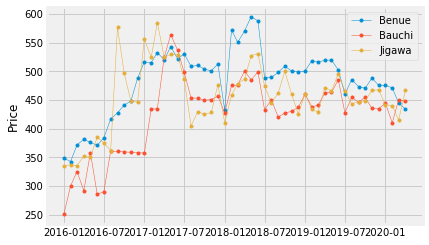

In [12]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['AGRIC EGGS DOZEN BENUE'], marker ='.',linewidth=0.5,label='Benue')
ax.plot(newfoodprice['Agric eggs medium size BAUCHI'], marker ='.',linewidth=0.5,label='Bauchi')
ax.plot(newfoodprice['Agric eggs medium size JIGAWA'], marker ='.',linewidth=0.5,label='Jigawa')
ax.set_ylabel('Price')
ax.legend();

there is general price inflation between between 2016-2019, withe prices slightly reducing in recent times

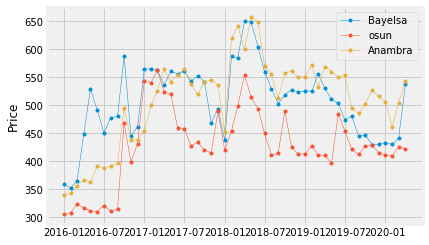

In [13]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Agric eggs medium size BAYELSA'], marker ='.',linewidth=0.5,label='Bayelsa')
ax.plot(newfoodprice['Agric eggs medium sizeOSUN'], marker ='.',linewidth=0.5,label='osun')
ax.plot(newfoodprice['Agric eggs medium sizeANAMBRA'], marker ='.',linewidth=0.5,label='Anambra')

ax.set_ylabel('Price')
ax.legend();

Although following the same National price trend, Anambra and Bayelsa consistently have higher than than the national average and osun lower than the national average with jigawa,benue and bauchi slighlty above or below the current national average

the three states above follow the same trend but tend to have large spikes and dips at different times but currently are close to the national average, none of the states folow the relatively smooth upward spike in price in 2016 that the national average had and did not have relatively stablity in price of the national average.

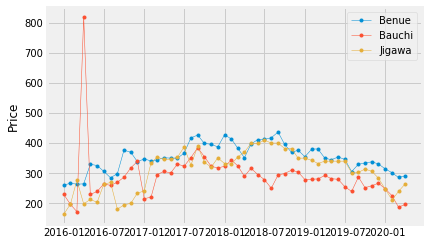

In [14]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Beans brown,sold loose   BENUE'], marker ='.',linewidth=0.5,label='Benue')
ax.plot(newfoodprice['Beans brown,sold looseBAUCHI'], marker ='.',linewidth=0.5,label='Bauchi')
ax.plot(newfoodprice['Beans brown,sold looseJIGAWA'], marker ='.',linewidth=0.5,label='Jigawa')
ax.set_ylabel('Price')
ax.legend();

although there is an extremly abnormal price spike in bauchi during 2016 it generally follows the northern beans price pattern and the prices of beans has fallen to its 2016 levels

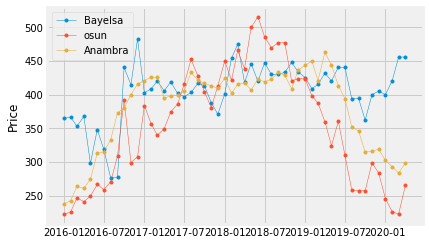

In [15]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Beans brown,sold looseBAYELSA'], marker ='.',linewidth=0.5,label='Bayelsa')
ax.plot(newfoodprice['Beans brown,sold looseOSUN'], marker ='.',linewidth=0.5,label='osun')
ax.plot(newfoodprice['Beans brown,sold looseANAMBRA'], marker ='.',linewidth=0.5,label='Anambra')

ax.set_ylabel('Price')
ax.legend();

in the south beanprices increased to a higher price than the north but has returned to it 2016 price levels but has always been more expensive that northern Nigeria prices

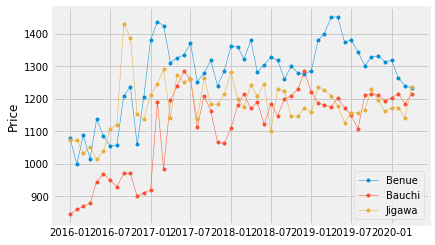

In [16]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Beef,boneless   BENUE'], marker ='.',linewidth=0.5,label='Benue')
ax.plot(newfoodprice['Beef,bonelessBAUCHI'], marker ='.',linewidth=0.5,label='Bauchi')
ax.plot(newfoodprice['Beef,bonelessJIGAWA'], marker ='.',linewidth=0.5,label='Jigawa')
ax.set_ylabel('Price')
ax.legend();

following the the nationa trend of a 2016-2018 rise, relative stability in 2018-2019 and a slight upward trend in 2020

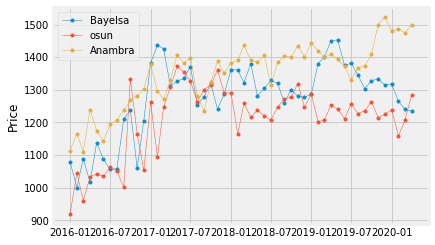

In [17]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Beef,boneless   BENUE'], marker ='.',linewidth=0.5,label='Bayelsa')
ax.plot(newfoodprice['Beef,bonelessOSUN'], marker ='.',linewidth=0.5,label='osun')
ax.plot(newfoodprice['Beef,bonelessANAMBRA'], marker ='.',linewidth=0.5,label='Anambra')

ax.set_ylabel('Price')
ax.legend();

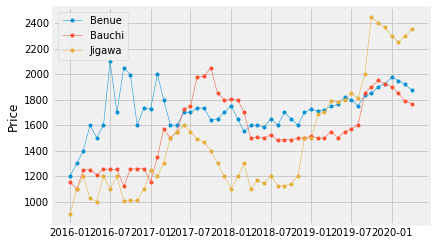

In [18]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Frozen chicken BENUE'], marker ='.',linewidth=0.5,label='Benue')
ax.plot(newfoodprice['Frozen chickenBAUCHI'], marker ='.',linewidth=0.5,label='Bauchi')
ax.plot(newfoodprice['Frozen chickenJIGAWA'], marker ='.',linewidth=0.5,label='Jigawa')
ax.set_ylabel('Price')
ax.legend();

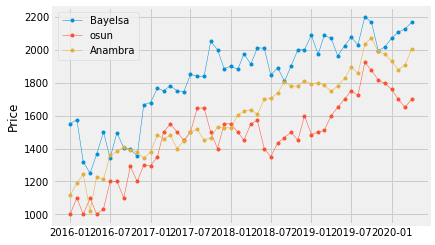

In [19]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Frozen chickenBAYELSA'], marker ='.',linewidth=0.5,label='Bayelsa')
ax.plot(newfoodprice['Frozen chickenOSUN'], marker ='.',linewidth=0.5,label='osun')
ax.plot(newfoodprice['Frozen chickenANAMBRA'], marker ='.',linewidth=0.5,label='Anambra')

ax.set_ylabel('Price')
ax.legend();

the price of frozen chicken has maintaine a constant risein price for the last four years

### my theory

In 2016 Nigeria experience an extreme crash in the value of our currency resulting the price of several commodities shooting up, especially in the case of imported food such as Frozen chicken, i also theorize the slight upward trend in pricing is due to corona virus restriction.

## Recommendation

* comparision of more states such as some states like Lagos, kano and Rivers have large cities that would make their food pricing significantly different from surround states in their region
* Forcast pricing for individual states
* find datasets with increased data frequency